<a href="https://colab.research.google.com/github/Shibu778/MyNotebooks/blob/master/BinaryClassificationEpi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('drive/My Drive/epi_data.csv')

In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
df["OUTPUT_LABEL"] = df.y == 1
df["OUTPUT_LABEL"] = df["OUTPUT_LABEL"].astype(int)
df.pop('y')
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df = pd.read_csv('drive/My Drive/ds_data_nf_all.csv',header = None)
df

,0,1,2
0,1.7528,390.260,0
1,1.5843,1051.000,1
2,1.6854,217.780,0
3,1.4494,80.292,0
4,1.6404,218.250,0
...,...,...,...
11495,1.3258,61.708,0
11496,1.7640,885.910,1
11497,1.7416,211.690,0
11498,1.6067,242.490,0


In [ ]:
?pd.read_csv

In [ ]:
from google.colab import files
df.to_csv("Epi_data_labeled.csv")
files.download('Epi_data_labeled.csv')

In [ ]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return sum(y_actual) / len(y_actual)

print(
    "prevalence of the positive class: %.3f"
    % calc_prevalence(df[2].values)
)


prevalence of the positive class: 0.200


In [ ]:
print("# of Columns:", len(df.columns))

# of Columns: 3


In [ ]:
df.columns = ['d','s','OUTPUT_LABEL']
df.head()

,d,s,OUTPUT_LABEL
0,1.7528,390.260,0
1,1.5843,1051.000,1
2,1.6854,217.780,0
3,1.4494,80.292,0
4,1.6404,218.250,0


In [ ]:
collist = df.columns.tolist()
cols_input = collist[0:2]
df_data = df[cols_input + ["OUTPUT_LABEL"]]
df_data

,d,s,OUTPUT_LABEL
0,1.7528,390.260,0
1,1.5843,1051.000,1
2,1.6854,217.780,0
3,1.4494,80.292,0
4,1.6404,218.250,0
...,...,...,...
11495,1.3258,61.708,0
11496,1.7640,885.910,1
11497,1.7416,211.690,0
11498,1.6067,242.490,0


In [ ]:
# check for duplicated columns in cols_input
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "you have duplicated columns in cols_input"

set()


In [ ]:
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in df_data'

set()


In [ ]:
# check the size of df_data makes sense
assert (len(cols_input) + 1) == len(
    df_data.columns
), "issue with dimensions of df_data or cols_input"

In [ ]:
df_data = df_data.sample(n=len(df_data))
df_data = df_data.reset_index(drop=True)

In [ ]:
#df_data = df

In [ ]:
df_valid_test = df_data.sample(frac=0.3)
print("Validation/Test Split Size: %.1f" % (len(df_valid_test) / len(df_data)))

df_test = df_valid_test.sample(frac=0.5)
df_valid = df_valid_test.drop(df_test.index)

df_train_all = df_data.drop(df_valid_test.index)

Validation/Test Split Size: 0.3


In [ ]:
from google.colab import files
df_train_all.to_csv("Epi_data_train_all.csv")
files.download('Epi_data_train_all.csv')

In [ ]:
#df_data.columns = ['d','s','OUTPUT_LABEL']
#df_data.head()

In [ ]:
# check the prevalence of each
print(
    "Test prevalence(n = %d):%.3f"
    % (len(df_test), calc_prevalence(df_test.OUTPUT_LABEL.values))
)
print(
    "Valid prevalence(n = %d):%.3f"
    % (len(df_valid), calc_prevalence(df_valid.OUTPUT_LABEL.values))
)
print(
    "Train all prevalence(n = %d):%.3f"
    % (len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values))
)

Test prevalence(n = 1725):0.197
Valid prevalence(n = 1725):0.196
Train all prevalence(n = 8050):0.201


In [ ]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 11500)


In [ ]:
import numpy as np

rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

n = np.min([len(df_train_pos), len(df_train_neg)])
df_train = pd.concat([df_train_pos.sample(n=n, random_state=69), df_train_neg.sample(n=n, random_state=69)], axis=0, ignore_index=True)

df_train = df_train.sample(n=len(df_train), random_state=69).reset_index(drop=True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 3244):0.500


In [ ]:
from google.colab import files
df_train_neg.to_csv("Epi_data_train_neg.csv")
files.download('Epi_data_train_neg.csv')

In [ ]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [ ]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [ ]:
# a function to fill missing values with mean of the column if needed
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [ ]:
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

Training All shapes: (8050, 2)
Training shapes: (3244, 2) (3244,)
Validation shapes: (1725, 2) (1725,)


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [ ]:
?roc_auc_score

In [ ]:
thresh = 0.5

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.991
accuracy:0.945
recall:0.912
precision:0.976
specificity:0.977
prevalence:0.500
 
Validation:
AUC:0.987
accuracy:0.958
recall:0.899
precision:0.889
specificity:0.973
prevalence:0.196
 


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 69)
lr.fit(X_train_tf, y_train)

y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.991
accuracy:0.949
recall:0.925
precision:0.972
specificity:0.973
prevalence:0.500
 
Validation:
AUC:0.987
accuracy:0.958
recall:0.914
precision:0.878
specificity:0.969
prevalence:0.196
 


In [ ]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier(loss = 'log',alpha = 0.1)
SGDC.fit(X_train_tf, y_train)

y_train_preds = SGDC.predict_proba(X_train_tf)[:,1]
y_valid_preds = SGDC.predict_proba(X_valid_tf)[:,1]

print('SGDC')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, \
    sgdc_train_precision, sgdc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, \
    sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

SGDC
Training:
AUC:0.973
accuracy:0.901
recall:0.806
precision:0.996
specificity:0.997
prevalence:0.500
 
Validation:
AUC:0.962
accuracy:0.954
recall:0.799
precision:0.961
specificity:0.992
prevalence:0.196
 


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_tf, y_train)

y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, \
nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, \
nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.974
accuracy:0.942
recall:0.920
precision:0.963
specificity:0.965
prevalence:0.500
 
Validation:
AUC:0.962
accuracy:0.950
recall:0.905
precision:0.850
specificity:0.961
prevalence:0.196
 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 69)
tree.fit(X_train_tf, y_train)

y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, \
tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, \
tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.974
accuracy:0.942
recall:0.920
precision:0.963
specificity:0.965
prevalence:0.500
 
Validation:
AUC:0.956
accuracy:0.940
recall:0.923
precision:0.802
specificity:0.944
prevalence:0.196
 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 6, random_state = 69)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, \
rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, \
rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.996
accuracy:0.966
recall:0.964
precision:0.968
specificity:0.968
prevalence:0.500
 
Validation:
AUC:0.988
accuracy:0.953
recall:0.944
precision:0.837
specificity:0.955
prevalence:0.196
 


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=69)
gbc.fit(X_train_tf, y_train)

y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, \
gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, \
gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.974
accuracy:0.942
recall:0.917
precision:0.812
specificity:0.948
prevalence:0.196
 


In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)
etc.fit(X_train_tf, y_train)

y_train_preds = etc.predict_proba(X_train_tf)[:, 1]
y_valid_preds = etc.predict_proba(X_valid_tf)[:, 1]

print('Extra Trees Classifier')
print('Training:')
etc_train_auc, etc_train_accuracy, etc_train_recall, etc_train_precision, \
etc_train_specificity = print_report(y_train, y_train_preds, thresh)
print('Validation:')
etc_valid_auc, etc_valid_accuracy, etc_valid_recall, etc_valid_precision, \
etc_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

Extra Trees Classifier
Training:
AUC:0.995
accuracy:0.960
recall:0.960
precision:0.961
specificity:0.961
prevalence:0.500
 
Validation:
AUC:0.988
accuracy:0.951
recall:0.941
precision:0.832
specificity:0.954
prevalence:0.196
 


In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier()
xgbc.fit(X_train_tf, y_train)

y_train_preds = xgbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = xgbc.predict_proba(X_valid_tf)[:,1]

print('Xtreme Gradient Boosting Classifier')
print('Training:')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, \
xgbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, \
xgbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Xtreme Gradient Boosting Classifier
Training:
AUC:0.995
accuracy:0.960
recall:0.956
precision:0.963
specificity:0.963
prevalence:0.500
 
Validation:
AUC:0.989
accuracy:0.954
recall:0.944
precision:0.842
specificity:0.957
prevalence:0.196
 


In [ ]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB','XGBC','XGBC','ETC','ETC'],
                           'data_set':['train','valid']*9,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,xgbc_train_auc,xgbc_valid_auc,etc_train_auc,etc_valid_auc],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,xgbc_train_accuracy,xgbc_valid_accuracy,etc_train_accuracy,etc_valid_accuracy],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,xgbc_train_recall,xgbc_valid_recall,etc_train_recall,etc_valid_recall],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,xgbc_train_precision,xgbc_valid_precision,etc_train_precision,etc_valid_precision],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,xgbc_train_specificity,xgbc_valid_specificity,etc_train_specificity,etc_valid_specificity]})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

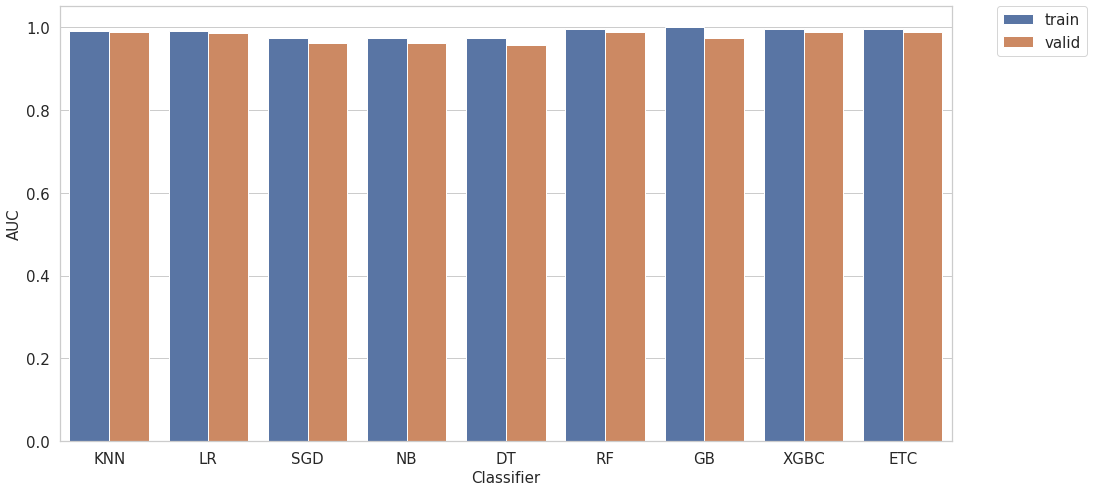

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'classifier', y = 'auc', hue = 'data_set', data = df_results)
ax.set_xlabel('Classifier', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

In [ ]:

# this is a quick way to tune one parameter of your model while holding everything else constant.
import time

my_params =  np.arange(0.05, 1.01, 0.05) # fill this in your list of parameters

# initialize arrays for storing the results
train_metrics = np.zeros(len(my_params))
valid_metrics = np.zeros(len(my_params))

# train a model for each param in a list
t1 = time.time()
for jj in range(len(my_params)):
    my_param = my_params[jj]
    
    # fit model
    model = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=my_param, min_samples_leaf=3, min_samples_split=20, n_estimators=100)
    model.fit(X_train_tf, y_train)
    # get predictions
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    metric_train = roc_auc_score(y_train, y_train_preds) # fill this in
    metric_valid = roc_auc_score(y_valid, y_valid_preds) # fill this in

    # save aucs
    train_metrics[jj] = metric_train
    valid_metrics[jj] = metric_valid
    
    # print the time
    t2 = time.time()
    print(my_param, t2-t1)
    t1 = time.time()

0.05 0.2499833106994629
0.1 0.2407371997833252
0.15000000000000002 0.2384636402130127
0.2 0.2378396987915039
0.25 0.24315786361694336
0.3 0.23067665100097656
0.35000000000000003 0.23542141914367676
0.4 0.23974370956420898
0.45 0.25087523460388184
0.5 0.23425650596618652
0.55 0.25527215003967285
0.6000000000000001 0.24918889999389648
0.6500000000000001 0.23532652854919434
0.7000000000000001 0.2393038272857666
0.7500000000000001 0.22953367233276367
0.8 0.24313926696777344
0.8500000000000001 0.23485255241394043
0.9000000000000001 0.2368631362915039
0.9500000000000001 0.24481749534606934
1.0 0.3056817054748535


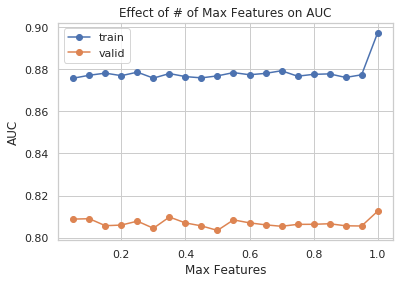

In [ ]:
import matplotlib.pyplot as plt

plt.plot(my_params, train_metrics,'o-',label = 'train')
plt.plot(my_params, valid_metrics,'o-',label = 'valid')

plt.xlabel('Max Features') # fill this in
plt.ylabel('AUC')# fill this in
plt.title('Effect of # of Max Features on AUC') # fill this in
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    
    plt.figure(figsize=(16, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

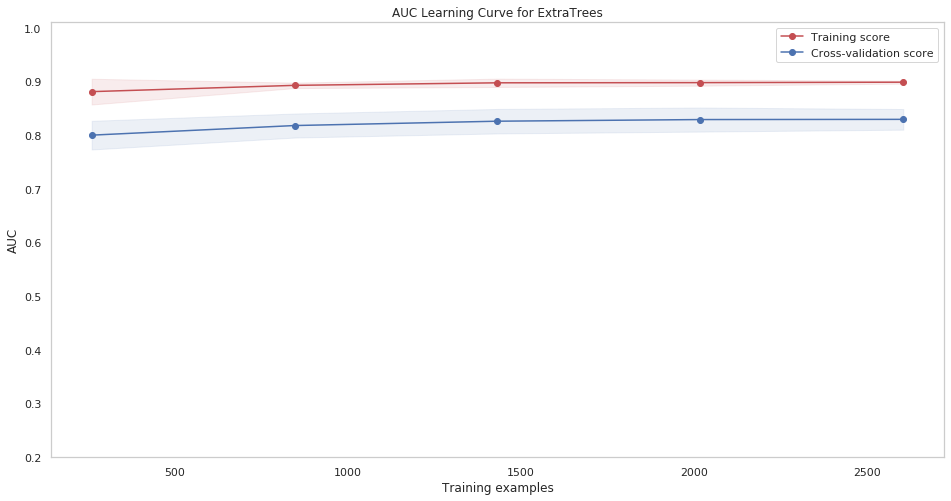

In [ ]:
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.


title = 'AUC Learning Curve for ExtraTrees'                                      # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0, min_samples_leaf=3, min_samples_split=20, n_estimators=100)                                      # fill this in
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)


plt.show()

In [ ]:
feature_importances = pd.DataFrame(etc.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [ ]:
feature_importances.head()

,importance
X127,0.018403
X125,0.016062
X161,0.014981
X20,0.014060
X130,0.013807


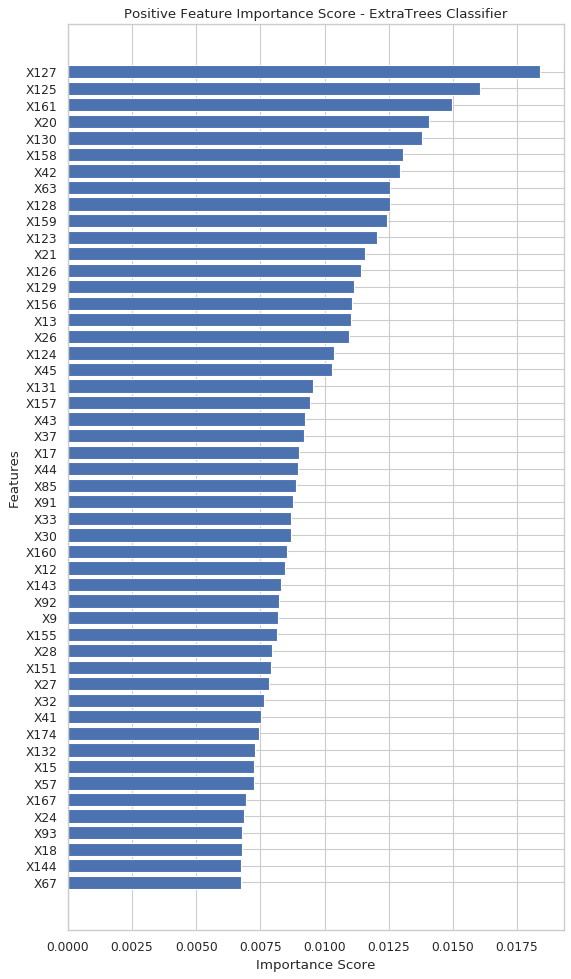

In [ ]:
pos_features = feature_importances.loc[feature_importances.importance > 0]

num = np.min([50, len(pos_features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - ExtraTrees Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

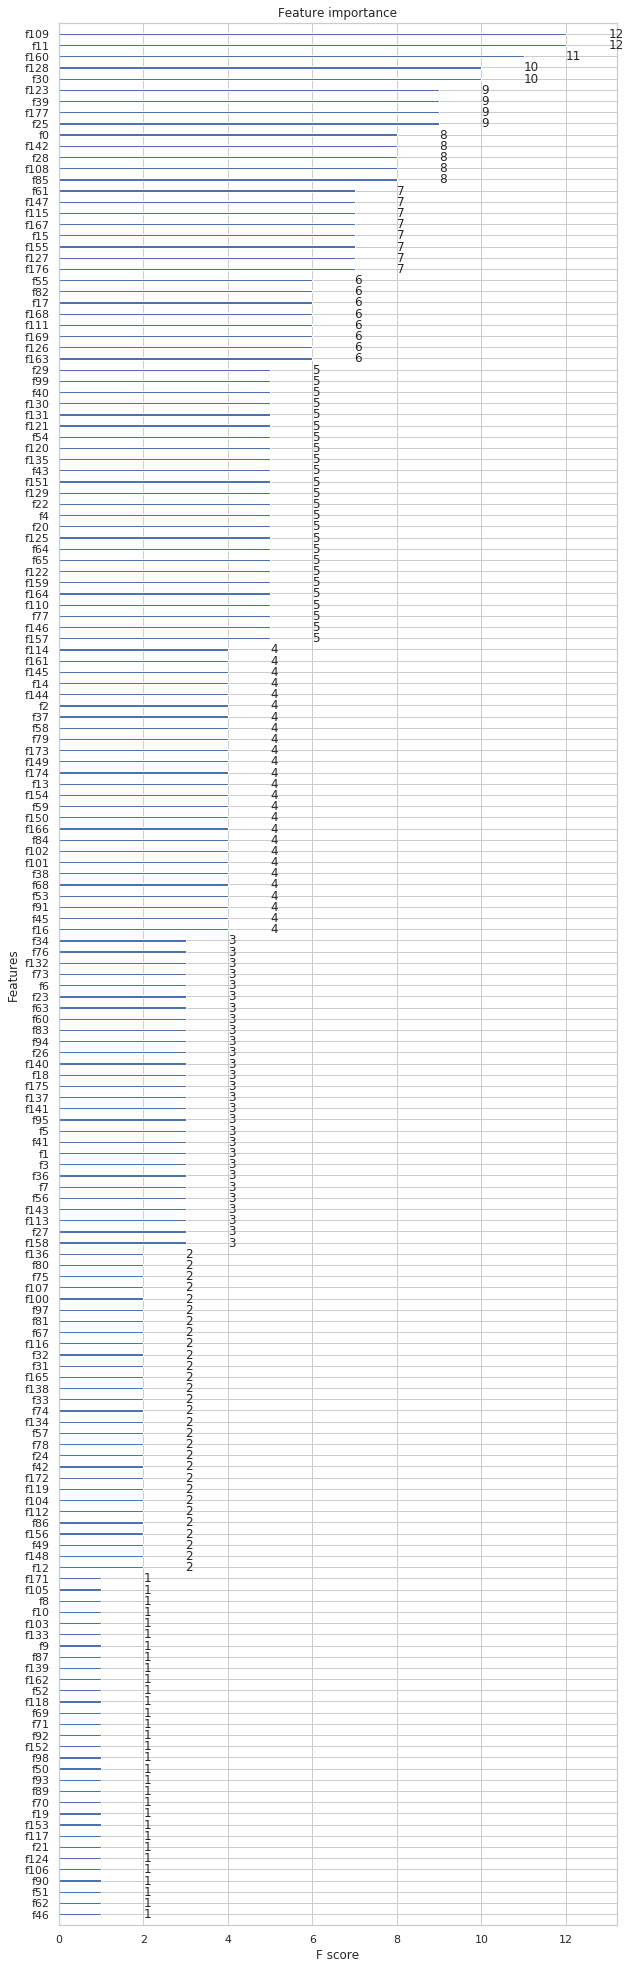

In [ ]:
ax = xgb.plot_importance(xgbc)
fig = ax.figure
fig.set_size_inches(10, 35)
plt.savefig('xgbcf.png')

In [ ]:
import xgboost
import shap
#!pip install shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X = df_train.drop(columns=['OUTPUT_LABEL'])
model = xgbc

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

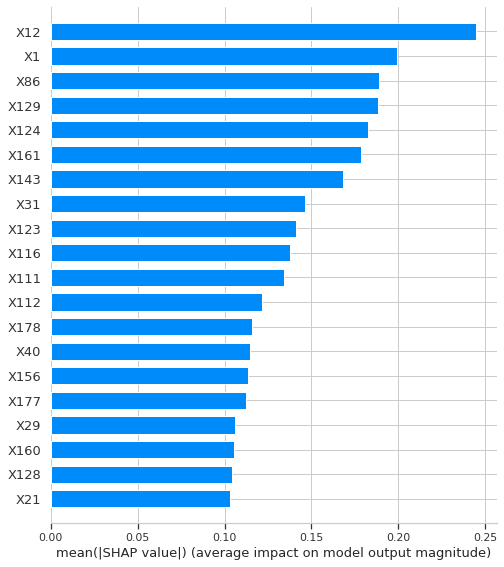

<Figure size 432x288 with 0 Axes>

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")
plt.savefig('shap.png')

In [ ]:
feature_importances = pd.DataFrame(xgbc.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

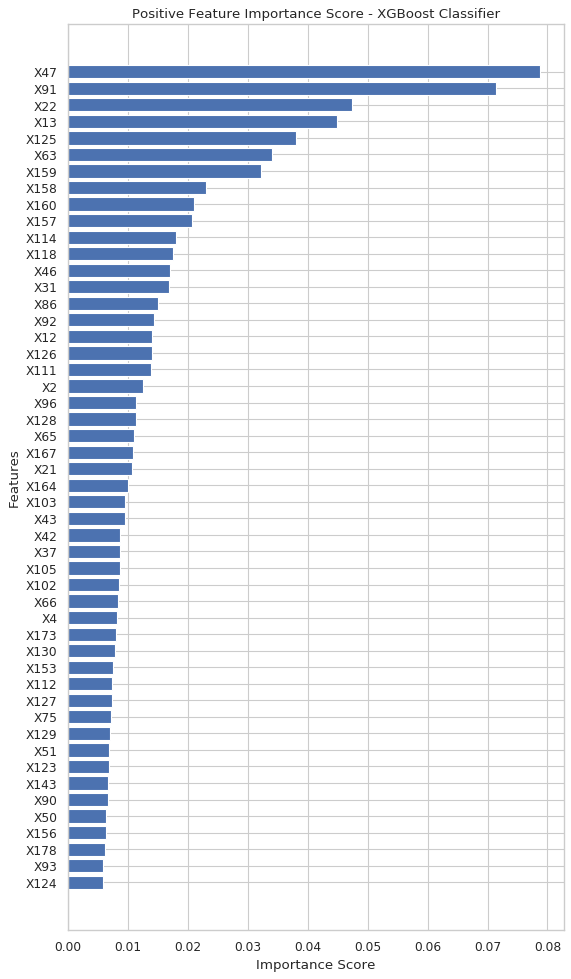

In [ ]:

pos_features = feature_importances.loc[feature_importances.importance > 0]

num = np.min([50, len(pos_features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - XGBoost Classifier')
plt.yticks(ylocs, feature_labels)
plt.savefig('xgbc.png')
plt.show()

In [ ]:
from dask.distributed import Client
client = Client()
client

In [ ]:
from tpot import TPOTClassifier
#!pip install tpot
import numpy as np
tpot_config = {
    'xgboost.XGBClassifier': {
        'n_estimators': [100],
        'max_depth': range(1, 11),
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'subsample': np.arange(0.05, 1.01, 0.05),
        'min_child_weight': range(1, 21),
        'nthread': [1]
    },
    'sklearn.ensemble.ExtraTreesClassifier': {
        'n_estimators': [100],
        'criterion': ["gini", "entropy"],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'bootstrap': [True, False]
    }

}
pipeline_optimizer = TPOTClassifier(verbosity=2, periodic_checkpoint_folder='tpot', generations=100, population_size=100, scoring='roc_auc', use_dask=True, config_dict=tpot_config)
pipeline_optimizer.fit(X_train_tf, y_train)
print(pipeline_optimizer.score(X_valid, y_valid))
pipeline_optimizer.export('tpot_exported_pipeline.py')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy

In [ ]:
best_model = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        make_union(
            make_union(
                FunctionTransformer(copy),
                make_union(
                    FunctionTransformer(copy),
                    make_union(
                        StackingEstimator(estimator=make_pipeline(
                            make_union(
                                FunctionTransformer(copy),
                                FunctionTransformer(copy)
                            ),
                            ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.1,
                                                 min_samples_leaf=10, min_samples_split=10, n_estimators=100)
                        )),
                        FunctionTransformer(copy)
                    )
                )
            ),
            FunctionTransformer(copy)
        )
    ),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.05,
                         min_samples_leaf=2, min_samples_split=4, n_estimators=100)
)

best_model.fit(X_train_tf, y_train)

y_train_preds = best_model.predict_proba(X_train_tf)[:, 1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:, 1]

print('ExtraTrees Classifier')
print('Training:')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(
    y_train, y_train_preds, thresh)
print('Validation:')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(
    y_valid, y_valid_preds, thresh)

ExtraTrees Classifier
Training:
AUC:1.000
accuracy:1.000
recall:0.999
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.993
accuracy:0.959
recall:0.956
precision:0.844
specificity:0.960
prevalence:0.183
 


In [ ]:
pickle.dump(best_model, open('best_classifier.pkl', 'wb'),protocol = 4)

In [ ]:
# load the model, columns, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
scaler = pickle.load(open('scaler.sav', 'rb'))

# load the data
#df_train = pd.read_csv('df_train.csv')
#df_valid= pd.read_csv('df_valid.csv')
#df_test= pd.read_csv('df_test.csv')

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [ ]:

y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [ ]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:1.000
accuracy:1.000
recall:0.999
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.993
accuracy:0.959
recall:0.956
precision:0.844
specificity:0.960
prevalence:0.183
 
Test:
AUC:0.994
accuracy:0.954
recall:0.963
precision:0.834
specificity:0.951
prevalence:0.202
 


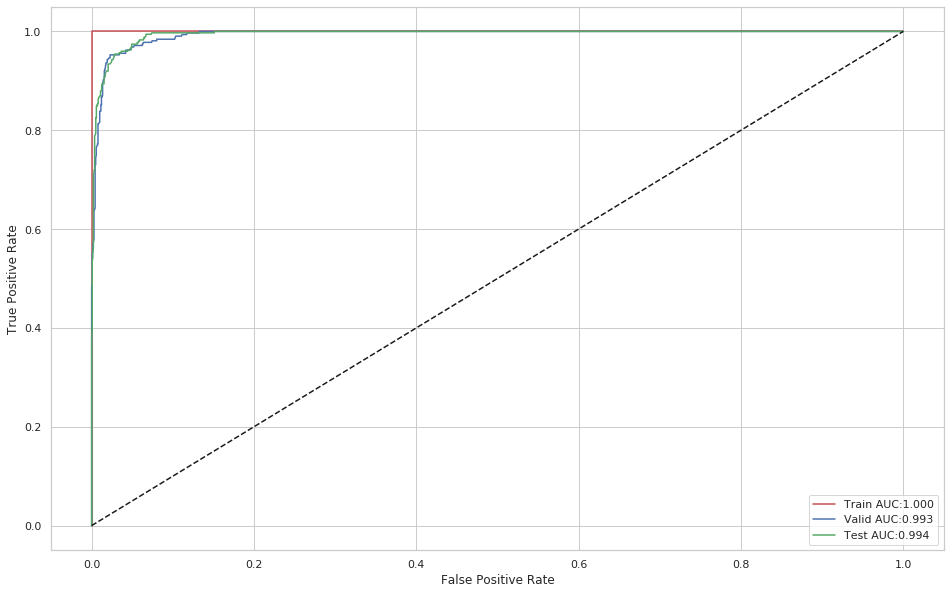

In [ ]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
!pip install tpot